# NTD Proposed Changes 2025-2026 Analysis

Proposed Change Text:

https://www.federalregister.gov/documents/2024/10/31/2024-25341/national-transit-database-proposed-reporting-changes-and-clarifications-for-report-years-2025-and


Task:
- As Caltrans DDS prepare to submit comments of these proposed changes to NTD, the Data Science branch is tasked to address 3 areas the proposed changes may affect the branch.
- Analysis of the following areas to be submitted to the Transit Quality Branch by 11/27/2024

In [1]:
import pandas as pd

from calitp_data_analysis.tables import tbls
import geopandas as gpd
from siuba import _, collect, count, filter, show_query

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
from shared_utils import schedule_rt_utils

## Area 1 - NTD Reporting Streamlining
>E: The first is on the topic of NTD reporting streamlining. There are `a few items being proposed that may add additional reporting burden` and `some that propose to streamline things`. Is this an area that you all have an opinion on?
>
>K: will take a look based on our understanding of `common past reporting errors identified in the NTD Modernization project` and provide some comments. 
>
>E: That sounds great
>
>E: Overall would you say that the `increase in reporting burden would be worth it in terms of the data collected?` And on the converse would any `reductions in reporting burden cause a loss of data?`

### <u>Revisit the NTD Modernization - Issues Analysis</u>
Slalom completed an analysis of the most common erorrs in NTD reporting for 2020, 2021 and 2022 by frequency, type and agency. 

As reported, 3 issues account for ~25% of all errors:
>1. RR20F-005: The cost per hour changed by 30% or more. 
>2. A10-033: The number of General Purpose Maintenance Facilities differs from previous year. 
>3. RR20F-146: The miles per vehicle changed by 20% or more.

Slalom identified a list of the top 23 errors by frequency and most comments to determine which errors should be prioritized first.

sorted by issue ID:

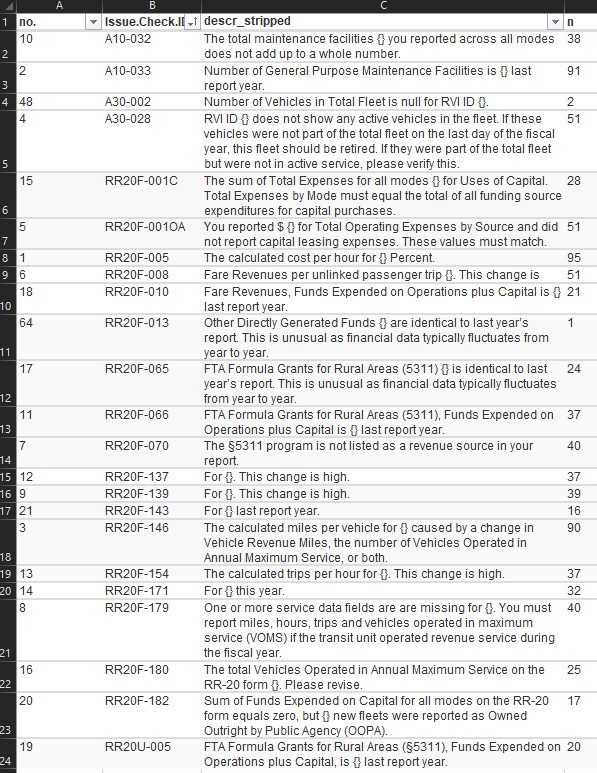
- 2x A10 errors
- 2x A30 errors
- 18x RR20F errors
- 1x RR20U errors

### <u>Notes from Proposed Changes document</u>

- **Sec B: increases reporting burden for all**
    - requires agencies to submit shapes.txt
    - align agency_id to NTD ID
    
- **Sec C: decreases reporting burden for all**
    - FTA acknowledges that the a15 and a10 is causing discrepanices
    - removes A-10 form
    - moves ADA data and other data from A-10 form to new extended A-15 form
    - clarifies what a "station" or "facility" is and how to count them for reporting
    - establish a standardize reporting method for passenger stations and facilities
    - **`Sec C directly relates to the issues analysis, A10 error was the 2nd more common error in reporting`**

- **Sec D: slight increase reporting burden for all**
    - proposes to add new categories to A-20 form:
    	1. “Track—Turntable,” 
		2. “Power and Signal—Pump Rooms”
        3. “Power and Signal—Fan Plants” 
    - Adds a "decade of construction" field to these category. this way FTA can more accurately capture an asset was reconstructed or renovated.

- **Sec E: may slightly increase reporting burden for some**
    - clarifies what counts as a cyber security event and adds more choices to better describe what type of event has happened
    - also expands what is IT infrastures and an heiarchy of events
    - I believe this reporting only applies IF the agency experiences a security event. So an agency who has not had any security events, will not have an increased reporting burden

- **Sec F: may slightly increase reporting burden for some**
    - revise the NTD major event reporting requirements to capture the new “disabling damage” event category
    - similar to Sec e, only applies if a safety event occurs

- **Sec G: decreases reporting burden for some**
    - there are some unique rural operators that operate in multiple, small areas, but have the full reporter status
    - proposes that these unique operators get a waiver to turn them into reduced reporters
    - FTA estimates this affects 10-15 agencies.

- **Sec H: may significantly increase reporting burden for some**
    - propose to have a new category in NTD reporting field to allow transit agencies to declare if they are a voluntary reporter or not
    - if a transit agency decides to become a voluntary reporter, they must complete the NTD report in its entirety. 
    - These reporters voluntarily comply with all NTD reporting requirements under the NTD rule (49 CFR Part 630) and the USOA.

## <u>Comments for Area 1</u>
Regarding the possible affects on the Data Science Branch, we have the biggest interest in Sections C and G as it affects NTD metrics we typically use in analyses.

Slalom conducted an analysis that looked into the types of reporting errors Caltrans received from NTD for 3 reporting years. The analysis found that Form A-10 errors were quite common. Section C of the proposed changes state that FTA is also awear of the issues in the A-10 and A-15 form. The proposed changes eliminates the A-10 entirely and moves some of the initial A-10 metrics over to a new, extended A-15 form. This change aims to reduce the reporting burden for transit agencies.

Sections G concerns changing rural operators with full reporter responsibilities to be reduced reporters. FTA aims to decrease the reporting burden, but this change affects an estimated 10-15 operators. going from full reporter to reduced reporters would mean the operator does not need to report data related to passenger miles or monthly service or safety stats

Section H proposes a change to the NTD reporting platform to include a field that identify Voluntary reporters. This slightly increases the reporting burden for all NTD reporters. Sections E and F may conditionally increase the reporting burden for some operators, if the operator experiences cyber security or safety events. Finally, Section D slightly incresses the reporting burden by proposing new categories in to A-20 form.

Overall, the Data Science Branch support the proposed changes. The potential increae in reporting burden under sections B, E, F and H are a worth it for the decreae in reporting burden in section C. The data Science Branch does not think any data would be lost in section C, as the initial metics in the A-10 will move to the new A-15 form.

Section G, may have a significant impact but will depend on which operators meet ALL the criteria to be a reduced reporter. See next section for more analysis on section G.


---

## Area 2 - Rural, Full Reporters to Reduced Reporters
> E: The second area is on the topic of NTD data coming through as a result of a `potential reduction in some full reporters in rural areas`. I’m not sure which ones these would be because the rulemaking wouldn’t affect all reporters. I’m also `not sure what data wouldn’t be reported as a result`. Is this something the analyst team can look into further… ie see if the proposed change in Section G would affect any California agencies and what data we may not receive from NTD as a result.
>
> K: `identify which CA agencies are full reporters in rural areas that meet the criteria in section G`, although I think we’d do it based on `2023 NTD data` and FTA would do it on 2024 data. I am not sure if there would be data loss based on FTA’s assessment that these agencies were historically Rural reporters.
>
> E: 2.	Yeah, I’m not expecting there would be much impact here, but perhaps it `could affect something like Fresno County` or something that provides a lot of rural service, but is large enough to be a full reporter. It’s worth flagging and understanding if it could be an impact or not. 
>
>E: did you analysis conclude that as many as 26 agencies potentially no longer show up in monthly reports?

### <u>Understanding the difference between urban Full Reporters and urban Reduced Reporters</u>

Per NTD reporting manual
>Full Reporters must provide the Annual Report, as well as Monthly Ridership (MR) and monthly Safety and Security reports. All other reporter types file their reports on an annual basis.

>Full Reporters must report data for total revenues earned during the fiscal year. Reduced Reporters only report operating and capital expenditures incurred in the fiscal year, by source of revenue.

**List of form used by both Urban Full and Reduced Reporters:**
1. Basic Information (Form P-10)
2. Modes and Types of Service (Form P-20)
3. Reporter Users (Form P-30)
4. General Transit Feed Specification Data for Fixed Route Modes (Form P-50)
5. Identification (Form B-10)
6. Geospatial Data for Demand Response Modes (Form B-15)
7. Contractual Relationship Data Requirements (Form B-30)
8. Transit Asset Management Performance Measure Targets (Form A-90)
9. Stations and Maintenance Facilities (Form A-10)
10. Transit Asset Management Facilities Inventory (Form A-15)
11. Revenue Vehicle Inventory (Form A-30)
12. Service Vehicle Inventory (Form A-35)
13. Reporting Federal Funding Allocation Data (Form FFA-10)
14. CEO Certification (Form D-10)


**List of unique forms for Urban Full Reporters:**
1. Reportable Segments (Form P-40)
2. Funding Sources (Form F-10)
3. Capital Expenses (Form F-20)
4. Operating Expenses: Uniform System of Accounts Functions and Object Classes (Form F-30)
5. Operating Expenses: Uniform System of Accounts Object Classes — Reconciling Items (Form F-40)
6. Uniform System of Accounts Object Classes: Financial Statement (Form F-60)
7. Monthly Ridership Reporting (Form MR-20)
8. Weekly Reference Reporting (Form WE-20)
9. Transit Way Mileage (Form A-20)
10. Employees (Form R-10)
11. Maintenance Performance (Form R-20)


**List of unique forms for Urban Reduced Reporters:**
1. S&S-60 Safety Data Form
2. Reduced Reporting Form (Form RR-20)
3. Transit Asset Management Performance Measure Targets (Form A-90)
---


### FTAs proposed solution for these rural operator, full reporters

>FTA proposes a waiver process in which reporters that predominantly serve rural areas may request an exemption from filing as a Full Reporter. Effectively, this would mean that operators receiving the waiver would report as Reduced Reporters instead.
>
>FTA proposes to use data from the most recent year's validated and accepted data to evaluate eligibility for this waiver, and FTA would grant the waiver if each of the above criteria are met. Based on current available data, **FTA estimates that approximately 10-15 agencies would be eligible for this waiver.**
>
>FTA would automatically identify agencies that qualify for this waiver ... All eligible reporters then would be presented with the option to request the waiver annually during the Report Year Kick-Off (RYKO) process



## <u>Comments for Area 2</u>

If an operator, under this proposed change, goes from Full to Reduced reporter, we can expect to miss data from 11 forms. However, those unique forms dont look familar in the ntd validation report pipeline so im unsure what kind of impact the data science branch would see.

Will need to see if theres equivilant forms between Full and Reduced reporters that report similar data but in different forms.

FTA's method for presenting elibible reporters of the waiver process seem a little unclear. I assume FTA will notify only the reporters that meet all the criteria in section G, and NOT all reporters. Notifying all reporters of a possible waiver they might not be eligible for would cause a lot of confusion.

### <u>Query the warehouse to get find all the reporters that meet Sec G criteria</u>

Sec G criteria:
- Receives funding under 49 U.S.C. `5311`,
- Reports `one or more` primary or secondary `UZA`s on their Federal Funding Allocation form (`FFA-10`),
- Operates `more than 30` Vehicles Operated in Maximum Service (`VOMS`),
- Operates `fewer total VOMS in urbanized areas (UZAs)` than `rural (non-UZA) areas`, and
- Allocates `more total Vehicle Revenue Miles (VRM) to non-UZAs` than `UZAs`.


#### dim_annual_funding_sources
- for 5311 agencies (rural operators)
- Also has UZA and VOMS

In [3]:
# Has 5311 data for operators, and UZA, VOMS, 
ntd_funding_sources = (tbls.mart_ntd.dim_annual_funding_sources()
                    >> filter(_.report_year == "2023",
                              _.fta_rural_progam_5311 > 0,
                              _.reporter_type == "Full Reporter",
                              _.primary_uza_code is not None
                             )
                    >> collect()
                   )

keep_cols_0=[
    "funding_source",
    "agency",
    "agency_voms",
    "fta_rural_progam_5311",
    "ntd_id",
    "organization_type",
    "primary_uza_population",
    "report_year",
    "reporter_type",
    "primary_uza_code",
    "primary_uza_name"
]

ntd_funding_sources = ntd_funding_sources[keep_cols_0]
ntd_funding_sources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   funding_source          134 non-null    object 
 1   agency                  134 non-null    object 
 2   agency_voms             134 non-null    float64
 3   fta_rural_progam_5311   134 non-null    float64
 4   ntd_id                  134 non-null    object 
 5   organization_type       134 non-null    object 
 6   primary_uza_population  134 non-null    float64
 7   report_year             134 non-null    object 
 8   reporter_type           134 non-null    object 
 9   primary_uza_code        134 non-null    object 
 10  primary_uza_name        134 non-null    object 
dtypes: float64(3), object(8)
memory usage: 11.6+ KB


#### dim_annual_service_agencies
- for UZA, VOMS and VRM

In [4]:
# Has UZA, VRM and  VOMS. 

ntd_service_agencies = (tbls.mart_ntd.dim_annual_service_agencies ()
                    >> filter(_.report_year == "2023",
                              _.agency_voms > 30,
                              _.state == "CA",
                              _.primary_uza_code is not None
                             )
                    >> collect()
                   )

keep_col_1 =[
    "key",
    "report_year",
    "ntd_id",
    "agency",
    "reporter_type",
    "organization_type",
    "city",
    "state",
    "agency_voms",
    "primary_uza_code",
    "primary_uza_name",
    "primary_uza_population",
    "actual_vehicles_passenger_car_revenue_miles"
]

ntd_service_agencies = ntd_service_agencies[keep_col_1]

ntd_service_agencies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   key                                          65 non-null     object 
 1   report_year                                  65 non-null     object 
 2   ntd_id                                       65 non-null     object 
 3   agency                                       65 non-null     object 
 4   reporter_type                                65 non-null     object 
 5   organization_type                            65 non-null     object 
 6   city                                         65 non-null     object 
 7   state                                        65 non-null     object 
 8   agency_voms                                  65 non-null     float64
 9   primary_uza_code                             63 non-null     float64
 10  prim

#### Merge dataframes to get 5311 agencies in CA with >30 VOMS with UZA names

In [5]:
on_list =[
    "report_year",
    "agency",
    "reporter_type",
    "organization_type",
    "organization_type",
    "agency_voms",
    "primary_uza_name",
    "ntd_id",
    "primary_uza_population"
]
merge = ntd_service_agencies.merge(
    ntd_funding_sources, 
    how="inner", 
    on= on_list, 
    indicator=True )

In [6]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 25
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   key                                          26 non-null     object  
 1   report_year                                  26 non-null     object  
 2   ntd_id                                       26 non-null     object  
 3   agency                                       26 non-null     object  
 4   reporter_type                                26 non-null     object  
 5   organization_type                            26 non-null     object  
 6   city                                         26 non-null     object  
 7   state                                        26 non-null     object  
 8   agency_voms                                  26 non-null     float64 
 9   primary_uza_code_x                           26 non-null     float6

#### Who are the agencies that match Section G Critera?

In [7]:
merge["agency"].value_counts()

Santa Cruz Metropolitan Transit District                                             1
San Mateo County Transit District, dba: SamTrans                                     1
Stanislaus Regional Transit Authority                                                1
Marin County Transit District, dba: Marin Transit                                    1
Butte County Association of Governments, dba: Butte Regional Transit/B-Line          1
San Luis Obispo Regional Transit Authority                                           1
Kings County Area Public Transit Agency                                              1
County of Placer, dba: Placer County Transit/TART                                    1
Transit Joint Powers Authority for Merced County, dba: Merced The Bus                1
Ventura County Transportation Commission                                             1
The Eastern Contra Costa Transit Authority, dba: Tri Delta Transit                   1
Victor Valley Transit Authority            

In [8]:
merge

,key,report_year,ntd_id,agency,reporter_type,organization_type,city,state,agency_voms,primary_uza_code_x,primary_uza_name,primary_uza_population,actual_vehicles_passenger_car_revenue_miles,funding_source,fta_rural_progam_5311,primary_uza_code_y,_merge
0,231d30a033adffad7c05ad22cdffc83a,2023,90006,Santa Cruz Metropolitan Transit District,Full Reporter,Independent Public Agency or Authority of Tran...,Santa Cruz,CA,93.0,79336.0,"Santa Cruz, CA",169038.0,2975126.0,federal,263285.0,79336.0,both
1,c66136eb07990c683307924891da05a5,2023,90009,"San Mateo County Transit District, dba: SamTrans",Full Reporter,Independent Public Agency or Authority of Tran...,San Carlos,CA,331.0,78904.0,"San Francisco--Oakland, CA",3515933.0,7793698.0,federal,783902.0,78904.0,both
2,b54cef7138d0057e9085da47db94506e,2023,90012,"San Joaquin Regional Transit District, dba: Sa...",Full Reporter,Independent Public Agency or Authority of Tran...,Stockton,CA,93.0,85087.0,"Stockton, CA",414847.0,2612286.0,federal,1269577.0,85087.0,both
3,91df0abfcbd3472d38a4224067582dc3,2023,90013,"Santa Clara Valley Transportation Authority, d...",Full Reporter,Independent Public Agency or Authority of Tran...,San Jose,CA,512.0,79039.0,"San Jose, CA",1837446.0,21779295.0,federal,380553.0,79039.0,both
4,9c81bfb86d1bbeaac2e00c6c0142c6cb,2023,90026,San Diego Metropolitan Transit System,Full Reporter,Independent Public Agency or Authority of Tran...,San Diego,CA,774.0,78661.0,"San Diego, CA",3070300.0,34095949.0,federal,878451.0,78661.0,both
5,732ac248345346f575122087bdbc3edd,2023,90030,North County Transit District,Full Reporter,Independent Public Agency or Authority of Tran...,Oceanside,CA,189.0,78661.0,"San Diego, CA",3070300.0,8204114.0,federal,1665659.0,78661.0,both
6,e835f62b4fa6954b297ae0788141e1fe,2023,90031,Riverside Transit Agency,Full Reporter,Independent Public Agency or Authority of Tran...,Riverside,CA,211.0,75340.0,"Riverside--San Bernardino, CA",2276703.0,9238973.0,federal,682130.0,75340.0,both
7,423019d2bdcac472b0cd1d81bc8380b7,2023,90062,Monterey-Salinas Transit,Full Reporter,Independent Public Agency or Authority of Tran...,Monterey,CA,165.0,80362.0,"Seaside--Monterey--Pacific Grove, CA",123495.0,4249833.0,federal,2013121.0,80362.0,both
8,f34f1051a6c81d1a4149fb93da4ff392,2023,90079,"SunLine Transit Agency, dba: SunLine",Full Reporter,Independent Public Agency or Authority of Tran...,Thousand Palms,CA,82.0,41347.0,"Indio--Palm Desert--Palm Springs, CA",361075.0,3938721.0,federal,1348953.0,41347.0,both
9,06b3bf7a35f002aa4ed531265a0b63eb,2023,90088,Napa Valley Transportation Authority,Full Reporter,Independent Public Agency or Authority of Tran...,Napa,CA,44.0,61057.0,"Napa, CA",84619.0,1345314.0,federal,1052042.0,61057.0,both


In [9]:
# Export to GCS
#merge.to_csv("gs://calitp-analytics-data/data-analyses/ntd/proposed_changes_agencies.csv")

# <u>TBD</u>
- get UZA geometry data
- get list of bus stop point locations for the agencies identified above
- overlay bus stop point location on UZA geometry to find stops that are outside of the UZA for an agency to help answer
>- Operates fewer total VOMS in urbanized areas (UZAs) than rural (non-UZA) areas, and
>- Allocates more total Vehicle Revenue Miles (VRM) to non-UZAs than UZAs.

### get UZA geojson data from FTA rest server

In [10]:
rest_server_link = "https://services.arcgis.com/xOi1kZaI0eWDREZv/ArcGIS/rest/services/FTA_Administrative_Boundaries/FeatureServer/5/query?where=1%3D1&objectIds=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&relationParam=&returnGeodetic=false&outFields=*&returnGeometry=true&returnCentroid=false&returnEnvelope=false&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=&defaultSR=&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&collation=&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnTrueCurves=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pgeojson&token="

In [11]:
#uza_data = gpd.read_file(rest_server_link)

#### get CA UZAs

In [12]:
#ca_uza = uza_data[uza_data['NAMELSAD'].str.contains(", CA")].reset_index(drop=True)

In [13]:
#ca_uza.to_parquet("gs://calitp-analytics-data/data-analyses/ntd/proposed_changes_ca_uza.parquet")

In [14]:
ca_uza = gpd.read_parquet("gs://calitp-analytics-data/data-analyses/ntd/proposed_changes_ca_uza.parquet")

In [15]:
ca_uza = ca_uza.to_crs("EPSG:2229")

In [16]:
display(
    ca_uza.info(),
    ca_uza.crs
)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       58 non-null     int64   
 1   UACE           58 non-null     object  
 2   NAMELSAD       58 non-null     object  
 3   POP            58 non-null     int64   
 4   AREALANDSQMI   58 non-null     float64 
 5   AREAWATERSQMI  57 non-null     float64 
 6   POPDEN         58 non-null     float64 
 7   Shape__Area    58 non-null     float64 
 8   Shape__Length  58 non-null     float64 
 9   geometry       58 non-null     geometry
dtypes: float64(5), geometry(1), int64(2), object(2)
memory usage: 4.7+ KB


None

<Projected CRS: EPSG:2229>
Name: NAD83 / California zone 5 (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - California - counties Kern; Los Angeles; San Bernardino; San Luis Obispo; Santa Barbara; Ventura.
- bounds: (-121.42, 32.76, -114.12, 35.81)
Coordinate Operation:
- name: SPCS83 California zone 5 (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

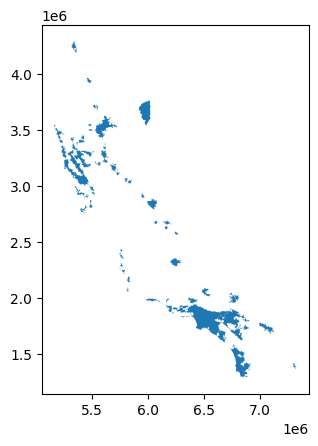

In [17]:
ca_uza.plot()

#### get stop location of all operators matching the criteria


In [18]:
# read in section g operators
sec_g_ops = pd.read_csv("gs://calitp-analytics-data/data-analyses/ntd/proposed_changes_agencies.csv")

In [19]:
sec_g_ops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   26 non-null     int64  
 1   key                                          26 non-null     object 
 2   report_year                                  26 non-null     int64  
 3   ntd_id                                       26 non-null     int64  
 4   agency                                       26 non-null     object 
 5   reporter_type                                26 non-null     object 
 6   organization_type                            26 non-null     object 
 7   city                                         26 non-null     object 
 8   state                                        26 non-null     object 
 9   agency_voms                                  26 non-null     float64
 10  prim

In [20]:
sec_g_ntd_id = list(sec_g_ops["ntd_id"].unique().astype("str"))

type(sec_g_ntd_id)

list

## Mimic what i did in Metabase

- dim org-to-dim providers gtfs data on key - org key
- results-to- dim gtfs datasets on schedule gtfs dataset key - key
- results-to-dim stops on base64url


In [30]:
# dim orgs
dim_orgs = (tbls.mart_transit_database.dim_organizations()
                    >> filter(_._is_current == True,
                              _.ntd_id.isin(sec_g_ntd_id),
                              #_.public_currently_operating_fixed_route == True
                             )
                    >> collect()
                   )

keep_cols_2 =[
    "key",
    "source_record_id",
    "name",
    "organization_type",
    "caltrans_district",
    "reporting_category",
    "is_public_entity",
    "ntd_id",
    "public_currently_operating_fixed_route",  
]

dim_orgs =dim_orgs[keep_cols_2]

dim_orgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   key                                     26 non-null     object
 1   source_record_id                        26 non-null     object
 2   name                                    26 non-null     object
 3   organization_type                       26 non-null     object
 4   caltrans_district                       26 non-null     object
 5   reporting_category                      26 non-null     object
 6   is_public_entity                        26 non-null     bool  
 7   ntd_id                                  26 non-null     object
 8   public_currently_operating_fixed_route  26 non-null     bool  
dtypes: bool(2), object(7)
memory usage: 1.6+ KB


In [31]:
# dim providers gtfs data
gtfs_providers = (tbls.mart_transit_database.dim_provider_gtfs_data()
                  >> filter(_._is_current == True,
                            _.organization_ntd_id.isin(sec_g_ntd_id),
                            #_.public_customer_facing_fixed_route == True
                  )
                  >> collect()
                 )
gtfs_providers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 30 columns):
 #   Column                                                  Non-Null Count  Dtype              
---  ------                                                  --------------  -----              
 0   key                                                     79 non-null     object             
 1   public_customer_facing_fixed_route                      79 non-null     bool               
 2   public_customer_facing_or_regional_subfeed_fixed_route  79 non-null     bool               
 3   organization_key                                        79 non-null     object             
 4   organization_name                                       79 non-null     object             
 5   organization_itp_id                                     79 non-null     int64              
 6   organization_hubspot_company_record_id                  79 non-null     object             
 7   organization_ntd_id

In [33]:
merge_1 = dim_orgs.merge(gtfs_providers, left_on= "key", right_on="organization_key", how="inner")

merge_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 78
Data columns (total 39 columns):
 #   Column                                                  Non-Null Count  Dtype              
---  ------                                                  --------------  -----              
 0   key_x                                                   79 non-null     object             
 1   source_record_id                                        79 non-null     object             
 2   name                                                    79 non-null     object             
 3   organization_type                                       79 non-null     object             
 4   caltrans_district                                       79 non-null     object             
 5   reporting_category                                      79 non-null     object             
 6   is_public_entity                                        79 non-null     bool               
 7   ntd_id             

In [23]:
# dim gtfs datasets
gtfs_dataset = (tbls.mart_transit_database.dim_gtfs_datasets()
                  >> filter(_._is_current == True,
                            #_.organization_ntd_id.isin(sec_g_ntd_id),
                            #_.public_customer_facing_fixed_route == True
                  )
                  >> collect()
                 )
gtfs_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype              
---  ------                                    --------------  -----              
 0   key                                       764 non-null    object             
 1   source_record_id                          764 non-null    object             
 2   name                                      764 non-null    object             
 3   type                                      764 non-null    object             
 4   regional_feed_type                        272 non-null    object             
 5   backdated_regional_feed_type              273 non-null    object             
 6   uri                                       764 non-null    object             
 7   future_uri                                3 non-null      object             
 8   deprecated_date                           87 non-null     ob

In [34]:
merge_2 = merge_1.merge(gtfs_dataset, left_on="schedule_gtfs_dataset_key" , right_on ="key", how = "left")

merge_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 78
Data columns (total 61 columns):
 #   Column                                                  Non-Null Count  Dtype              
---  ------                                                  --------------  -----              
 0   key_x                                                   79 non-null     object             
 1   source_record_id_x                                      79 non-null     object             
 2   name_x                                                  79 non-null     object             
 3   organization_type                                       79 non-null     object             
 4   caltrans_district                                       79 non-null     object             
 5   reporting_category                                      79 non-null     object             
 6   is_public_entity                                        79 non-null     bool               
 7   ntd_id             

In [60]:
url_list = list(set(merge_2["base64_url"].dropna()))

display(
    type(url_list),
    len(url_list)
)

list

43

In [61]:
url_list

['aHR0cHM6Ly9vbnRpbWUudnZ0YS5vcmcvZ3Rmcw==',
 'aHR0cHM6Ly9ndGZzLnZ0YS5vcmcvZ3Rmc192dGEuemlw',
 'aHR0cHM6Ly9kYXRhLnRyaWxsaXVtdHJhbnNpdC5jb20vZ3Rmcy9tZXJjZWR0aGVidXMtY2EtdXMvbWVyY2VkdGhlYnVzLWNhLXVzLnppcA==',
 'aHR0cDovL3NhbmpvYXF1aW5ydGQuY29tL1JURC1HVEZTL1JURC1HVEZTLnppcA==',
 'aHR0cHM6Ly9zdGFucnRhLnJpZGVyYWxlcnRzLmNvbS9JbmZvUG9pbnQvZ3Rmcy16aXAuYXNoeA==',
 'aHR0cHM6Ly9kYXRhLnRyaWxsaXVtdHJhbnNpdC5jb20vZ3Rmcy92aW5ldHJhbnNpdC1jYS11cy92aW5ldHJhbnNpdC1jYS11cy56aXA=',
 'aHR0cHM6Ly9hcGkuNTExLm9yZy90cmFuc2l0L2RhdGFmZWVkcz9vcGVyYXRvcl9pZD1SRw==',
 'aHR0cHM6Ly9uYXBhLnN5bmNyb21hdGljcy5jb20vZ3Rmcw==',
 'aHR0cHM6Ly9tYXJpbnRyYW5zaXQubmV0L2d0ZnM=',
 'aHR0cHM6Ly9rYXJ0LmNvbm5leGlvbnoubmV0L3J0dC9wdWJsaWMvdXRpbGl0eS9ndGZzLmFzcHg=',
 'aHR0cHM6Ly9hcGkuNTExLm9yZy90cmFuc2l0L2RhdGFmZWVkcz9vcGVyYXRvcl9pZD1TQw==',
 'aHR0cHM6Ly93d3cubXN0Lm9yZy9nb29nbGUvZ29vZ2xlX3RyYW5zaXQuemlw',
 'aHR0cHM6Ly9hcGkuNTExLm9yZy90cmFuc2l0L2RhdGFmZWVkcz9vcGVyYXRvcl9pZD1TTw==',
 'aHR0cHM6Ly9kYXRhLnRyaWxsaXVtdHJhbnNpdC5jb20vZ3Rmcy9wbGFjZ

In [76]:
#dim stops
dim_stops = (tbls.mart_gtfs.dim_stops()
                  >> filter(_.base64_url.isin(url_list),
                      #_.feed_key == "7480dcfabde855ba5915abb98f2fc393",
                      _._dt =="2024-11-29"
                  )
                  >> collect()
                 )
dim_stops.info()

/opt/conda/lib/python3.9/site-packages/sqlalchemy_bigquery/_types.py:101: SAWarning: Did not recognize type 'GEOGRAPHY' of column 'pt_geom'
  sqlalchemy.util.warn(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22203 entries, 0 to 22202
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   key                          22203 non-null  object             
 1   _gtfs_key                    22203 non-null  object             
 2   base64_url                   22203 non-null  object             
 3   feed_key                     22203 non-null  object             
 4   stop_id                      22203 non-null  object             
 5   tts_stop_name                0 non-null      object             
 6   stop_lat                     22203 non-null  float64            
 7   stop_lon                     22203 non-null  float64            
 8   pt_geom                      22203 non-null  object             
 9   zone_id                      12791 non-null  object             
 10  parent_station               1714 non-null   o

In [87]:
# create custom geometry col

geom_col = gpd.points_from_xy(dim_stops.stop_lon, dim_stops.stop_lat, crs="EPSG:2229")

<GeometryArray>
[<POINT (-120.717 35.321)>, <POINT (-120.693 35.643)>,
 <POINT (-120.616 35.104)>, <POINT (-120.606 35.134)>,
 <POINT (-120.662 35.283)>, <POINT (-120.693 35.508)>,
 <POINT (-120.693 35.507)>,  <POINT (-121.072 35.55)>,
   <POINT (-121.1 35.567)>, <POINT (-120.669 35.613)>,
 ...
 <POINT (-122.042 38.243)>, <POINT (-121.842 38.456)>,
 <POINT (-121.748 38.534)>, <POINT (-122.063 37.967)>,
 <POINT (-122.317 37.925)>, <POINT (-122.317 37.925)>,
 <POINT (-122.069 37.905)>, <POINT (-122.063 37.968)>,
 <POINT (-121.965 38.358)>, <POINT (-122.395 37.796)>]
Length: 22203, dtype: geometry

In [88]:
dim_stop_gdf = gpd.GeoDataFrame(dim_stops, geometry=geom_col)

In [89]:
merge_3 = merge_2.merge(dim_stop_gdf, on="base64_url")

merge_3.info()

/tmp/ipykernel_287/700845763.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'key_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_3 = merge_2.merge(dim_stop_gdf, on="base64_url")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 175440 entries, 0 to 175439
Data columns (total 88 columns):
 #   Column                                                  Non-Null Count   Dtype              
---  ------                                                  --------------   -----              
 0   key_x                                                   175440 non-null  object             
 1   source_record_id_x                                      175440 non-null  object             
 2   name_x                                                  175440 non-null  object             
 3   organization_type                                       175440 non-null  object             
 4   caltrans_district                                       175440 non-null  object             
 5   reporting_category                                      175440 non-null  object             
 6   is_public_entity                                        175440 non-null  bool               
 7   nt

In [90]:
# convert merge 3 to gdf

merge_3_gdf = gpd.GeoDataFrame(merge_3, geometry="geometry")

#merge_3_gdf.set_crs(epsg=2229, inplace=True) 

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:807: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fccf2afc760> has a label of '_valid_from_x' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:807: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fccf0cac670> has a label of '_valid_to_x' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:807: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fccf0caca30> has a label of '_valid_from_y' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:807: UserWarning: The handle <matplotlib.lines.Line2D 

<AxesSubplot:>

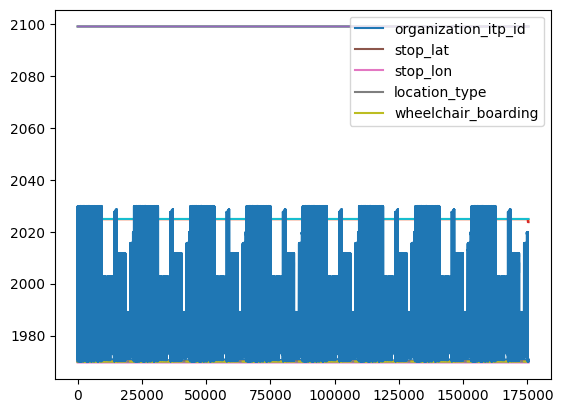

In [91]:
merge_3.plot()

## Area 3 - Volunteer Reporters
>E: The third area is that I noticed that it was mentioned in Section H that voluntary reports may help a state receive more money. Given this helpful piece of information, I had 3 follow-up ideas. 
>1. Can we figure out how it helps increase funding by being a voluntary reporter 
>2. Can we do an audit to see which agencies aren’t reporters that maybe could be and 
>3. What monetary benefit could be gained if we helped these agencies become voluntary reporters.

>K: would auditing this entail simply looking at organizations that don’t have an NTD ID? Or something else?

>E: Yes, I think we would look at all transit agencies in the transit database that operate fixed route service that don’t appear to have an NTD ID and are not present in NTD data.

In [25]:
# dim orgs
dim_orgs = (tbls.mart_transit_database.dim_organizations()
                    >> filter(_._is_current == True,
                              _.ntd_id.isna(),
                              _.public_currently_operating_fixed_route == True
                             )
                    >> collect()
                   )

keep_cols_2 =[
    "key",
    "source_record_id",
    "name",
    "organization_type",
    "caltrans_district",
    "reporting_category",
    "is_public_entity",
    "ntd_id",
    "public_currently_operating_fixed_route",  
]

dim_orgs =dim_orgs[keep_cols_2]

#dim_orgs.info()